In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime
from IPython.display import clear_output
import lightgbm as lgb
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline


RANDOM_STATE = 42

In [44]:
from IPython.display import clear_output

In [45]:
from generate_features import generate_features_time_series
from read_utils import read_data

In [46]:
train, test, sample_submission = read_data()

In [ ]:
(1, 11),
        (12, 34),
        (35, 52),
        (53, 74),
        (75, 94),
        (95, 137),
        (138, 166),
        (167, 216),
        (217, 278),
        (279, 321),
        (322, 339)

In [21]:
def print_full(x):
    pd.set_option('display.max_rows', 2000)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    #print(x)
#     pd.reset_option('display.max_rows')
#     pd.reset_option('display.max_columns')
#     pd.reset_option('display.width')
#     pd.reset_option('display.float_format')
#     pd.reset_option('display.max_colwidth')

In [22]:
print_full(train[train.card1 == 1039])

In [57]:
train[train.card1 == 1039][['isFraud'] + [f'V{i}' for i in range(306, 322)] + ['TransactionAmt']]

,isFraud,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,TransactionAmt
TransactionID,,,,,,,,,,,,,,,,,,
2988554,0,0.00,459.00,159.00,0.00,459.00,0.00,159.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
2988663,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00
2990032,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49.00
2990400,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70.00
2991264,0,0.00,44.50,0.00,0.00,44.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.50
2991997,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.95
2992065,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00
2992137,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,136.99
2992374,0,0.00,58.95,0.00,0.00,58.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.95


In [16]:
for ind, i in train.groupby('card1'):
    print(ind, i['isFraud'].mean(), len(i))
    
    print(i)
    
    print(i[i['isFraud'] > 0])
    
    a = input()
    clear_output()

1039 0.007547169811320755 530
               isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2988554              0         135553          100.00         W   1039  391.0   
2988663              0         137281           15.00         S   1039  391.0   
2990032              0         151768           49.00         W   1039  391.0   
2990400              0         155169           70.00         W   1039  391.0   
2991264              0         163730           34.50         W   1039  391.0   
...                ...            ...             ...       ...    ...    ...   
3575767              0       15775319           57.95         W   1039  391.0   
3575800              0       15776233           35.95         W   1039  391.0   
3576172              0       15783728           39.00         W   1039  391.0   
3576481              0       15789508           59.00         W   1039  391.0  

KeyboardInterrupt: 

In [6]:
v_groups = defaultdict(list)

for i in range(1, 340):
    print(i, sum(train[f'V{i}'].notnull()))
    
    v_groups[sum(train[f'V{i}'].notnull())].append(f'V{i}')

1 311253
2 311253
3 311253
4 311253
5 311253
6 311253
7 311253
8 311253
9 311253
10 311253
11 311253
12 514467
13 514467
14 514467
15 514467
16 514467
17 514467
18 514467
19 514467
20 514467
21 514467
22 514467
23 514467
24 514467
25 514467
26 514467
27 514467
28 514467
29 514467
30 514467
31 514467
32 514467
33 514467
34 514467
35 421571
36 421571
37 421571
38 421571
39 421571
40 421571
41 421571
42 421571
43 421571
44 421571
45 421571
46 421571
47 421571
48 421571
49 421571
50 421571
51 421571
52 421571
53 513444
54 513444
55 513444
56 513444
57 513444
58 513444
59 513444
60 513444
61 513444
62 513444
63 513444
64 513444
65 513444
66 513444
67 513444
68 513444
69 513444
70 513444
71 513444
72 513444
73 513444
74 513444
75 501376
76 501376
77 501376
78 501376
79 501376
80 501376
81 501376
82 501376
83 501376
84 501376
85 501376
86 501376
87 501376
88 501376
89 501376
90 501376
91 501376
92 501376
93 501376
94 501376
95 590226
96 590226
97 590226
98 590226
99 590226
100 590226
101 5902

In [16]:
print(v_groups)

defaultdict(<class 'list'>, {311253: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], 514467: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34'], 421571: ['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52'], 513444: ['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74'], 501376: ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94'], 590226: ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V12

TypeError: 'NoneType' object is not iterable

In [9]:
v_groups.keys()

dict_keys([311253, 514467, 421571, 513444, 501376, 590226, 81945, 81951, 139631, 139819, 130430, 141416, 590528, 589271, 82351])

In [21]:
train[[f'C{i}' for i in range(1, 15)]].corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


In [32]:
train['C12'].value_counts().head(50)

0.0      489199
1.0       76661
2.0       12242
3.0        4185
4.0        1716
5.0        1085
6.0         629
7.0         393
8.0         262
9.0         177
10.0        176
12.0        107
15.0        105
17.0        104
14.0        101
13.0         94
18.0         87
11.0         82
16.0         72
27.0         72
23.0         63
28.0         59
22.0         45
19.0         38
131.0        38
25.0         36
20.0         36
21.0         34
24.0         33
145.0        33
146.0        32
34.0         32
135.0        30
132.0        29
30.0         26
83.0         26
67.0         25
43.0         24
133.0        23
33.0         21
32.0         21
127.0        19
31.0         17
59.0         17
154.0        17
29.0         17
42.0         16
26.0         16
47.0         15
52.0         15
Name: C12, dtype: int64

(array([5.87969e+05, 3.64000e+02, 2.74000e+02, 1.52000e+02, 3.53000e+02,
        7.60000e+01, 1.30000e+01, 3.20000e+01, 2.10000e+01, 2.70000e+01,
        6.00000e+00, 1.40000e+01, 1.30000e+01, 1.60000e+01, 1.80000e+01,
        1.50000e+01, 3.00000e+00, 1.80000e+01, 1.90000e+01, 1.20000e+01,
        3.70000e+01, 1.80000e+01, 1.20000e+01, 1.50000e+01, 2.10000e+01,
        1.90000e+01, 2.20000e+01, 2.10000e+01, 1.30000e+01, 1.10000e+01,
        1.80000e+01, 1.20000e+01, 1.80000e+01, 1.40000e+01, 2.20000e+01,
        2.00000e+01, 9.00000e+00, 2.40000e+01, 1.50000e+01, 2.00000e+01,
        3.50000e+01, 2.10000e+01, 3.00000e+00, 1.50000e+01, 1.30000e+01,
        2.30000e+01, 3.30000e+01, 3.40000e+01, 2.30000e+01, 1.50000e+01,
        7.00000e+00, 2.40000e+01, 1.20000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.00000e+00, 2.60000e+01, 2.00

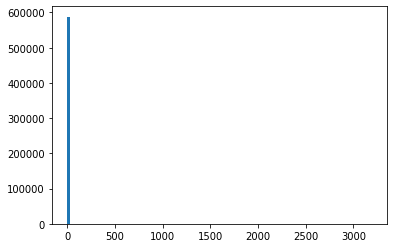

In [35]:
plt.hist(train['C12'], bins=100)

(array([5.0409e+05, 6.5300e+02, 2.2600e+02, 8.7000e+01, 5.5000e+01,
        3.5000e+01, 5.6000e+01, 3.7000e+01, 3.0000e+00, 1.2100e+02,
        9.7000e+01, 9.8000e+01, 6.3000e+01, 2.8600e+02, 9.2000e+01,
        0.0000e+00, 1.0000e+01, 3.5000e+01, 3.0000e+00, 0.0000e+00,
        6.0000e+00, 1.8000e+01, 2.6000e+01, 4.7000e+01, 2.0000e+01,
        3.2000e+01, 1.9000e+01, 1.7000e+01, 1.5000e+01, 1.5000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01, 7.0000e+00,
        1.5000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.5000e+01, 6.0000e+00,
        2.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 3.2000e+01,
        2.6000e+01, 5.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

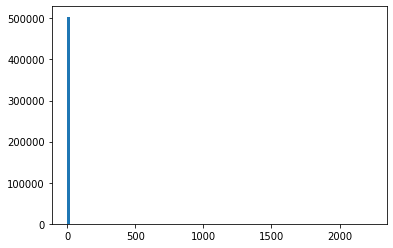

In [36]:
plt.hist(test['C12'], bins=100)

In [30]:
test['id_13'].value_counts().head(50)

27.0    69616
52.0    51661
14.0     3928
62.0      939
20.0      926
63.0      582
18.0      530
11.0      517
41.0      432
55.0      258
25.0      236
24.0      213
51.0      153
15.0      148
43.0       65
28.0       18
39.0       11
36.0       10
56.0       10
31.0        9
42.0        8
21.0        5
16.0        3
44.0        2
30.0        2
37.0        2
48.0        2
Name: id_13, dtype: int64

In [19]:
for i in range(1, 15):
    print(train[f'C{i}'].describe())

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64
count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64
count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64
count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64
count    590540.000000
mean          5.571526
std          25.786976
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max

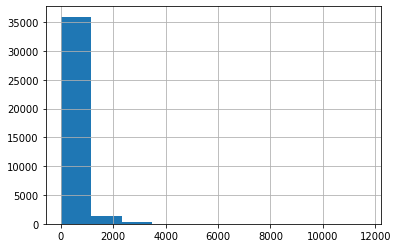

In [44]:
train['dist2'].hist()

In [ ]:
train['Tr']

In [49]:
train.iloc[10]['Tr']

0

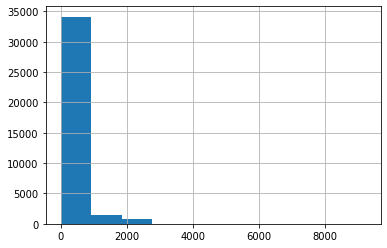

In [45]:
test['dist2'].hist()

(array([280130.,  13603.,  10600.,  17948.,  22770.,  34371.,  42104.,
         47800.,  53271.,  66674.]),
 array([0.        , 0.64630295, 1.29260589, 1.93890884, 2.58521178,
        3.23151473, 3.87781767, 4.52412062, 5.17042357, 5.81672651,
        6.46302946]),
 <a list of 10 Patch objects>)

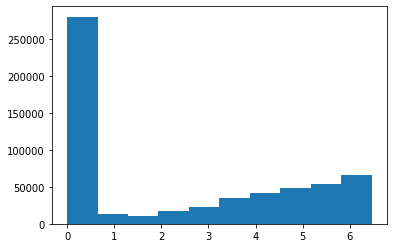

In [54]:
plt.hist(np.log(train['D1'] + 1), bins=10)

/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([397296.,  48422.,  31453.,  23507.,  18065.,  17238.,  13545.,
         16171.,  13612.,   9962.]),
 array([  0.,  64., 128., 192., 256., 320., 384., 448., 512., 576., 640.]),
 <a list of 10 Patch objects>)

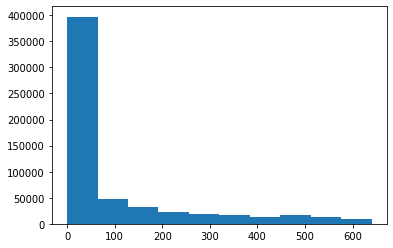

In [53]:
plt.hist(train['D1'], bins=10)

In [1]:
from generate_features import exchange_rate_took_place_feature

In [5]:
train = exchange_rate_took_place_feature(train)

In [6]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,is_foreign
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,False


In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
roc_auc_score(train.isFraud, train.is_foreign)

0.6276821312858637

In [20]:
train['TransactionAmt'].agg('nunique')

20902

In [4]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
train.card1

TransactionID
2987000    13926
2987001     2755
2987002     4663
2987003    18132
2987004     4497
           ...  
3577535     6550
3577536    10444
3577537    12037
3577538     7826
3577539    15066
Name: card1, Length: 590540, dtype: int64

In [11]:
train.columns.tolist()

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67

In [27]:
train[(train.card1 == 6550) & train.isFraud][['TransactionAmt'] + [f'V{i}' for i in range(35, 52)]]

,TransactionAmt,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51
TransactionID,,,,,,,,,,,,,,,,,,
3296326,25.95,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3297447,30.95,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3499900,87.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3537934,57.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3569276,97.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train[(train.card1 == 6550)  & ~train.isFraud][['TransactionAmt']+ [f'V{i}' for i in range(35, 52)]]

,TransactionAmt,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51
TransactionID,,,,,,,,,,,,,,,,,,
2987123,59.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987450,15.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2988501,145.00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2990085,39.00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2990673,67.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576417,34.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3576491,29.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3576499,49.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [50]:
train['addr2'].value_counts().head(30)

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
98.0         11
29.0         11
102.0        11
68.0         10
57.0         10
78.0          8
10.0          8
17.0          7
71.0          7
13.0          7
54.0          6
72.0          6
88.0          5
52.0          5
73.0          5
21.0          5
Name: addr2, dtype: int64

In [60]:
train[train['addr2'] == 27]['isFraud'].mean()

0.0

In [57]:
test[test['addr2'] == 60]

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3668471,18570591,49.614,C,2256,545.0,185.0,visa,226.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668475,18570686,49.614,C,13832,375.0,185.0,mastercard,224.0,debit,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668727,18575145,39.962,C,5365,177.0,185.0,mastercard,224.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3670183,18628213,58.653,C,5365,177.0,185.0,mastercard,224.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3672145,18658424,15.000,H,8755,500.0,185.0,mastercard,224.0,credit,296.0,...,chrome 67.0,24.0,2880x1800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170059,34210830,34.306,C,5812,408.0,185.0,mastercard,224.0,debit,374.0,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,E2104
4170107,34211971,52.627,C,12839,321.0,150.0,visa,226.0,debit,290.0,...,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-G965U Build/R16NW
4170174,34213068,38.732,C,15885,545.0,185.0,visa,138.0,debit,393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train[['card2', 'card3', 'card5']]

,card2,card3,card5
TransactionID,,,
2987000,NaN,150.0,142.0
2987001,404.0,150.0,102.0
2987002,490.0,150.0,166.0
2987003,567.0,150.0,117.0
2987004,514.0,150.0,102.0
...,...,...,...
3577535,NaN,150.0,226.0
3577536,225.0,150.0,224.0
3577537,595.0,150.0,224.0


In [75]:
train.card5.nunique()

119

In [80]:
np.array([[1, 1, 1], [2, 2, 2]]).mean(axis=1)

array([1., 2.])

In [95]:
train['card_counts'] = train.groupby('card1')['card5'].transform('nunique')
train['card_counts'].value_counts()

In [103]:
train[train['card_counts'] == 3]['isFraud'].mean()

0.11311053984575835

In [104]:
train['card_counts'].value_counts()

1.0    540570
2.0     48399
0.0       793
3.0       778
Name: card_counts, dtype: int64

In [306]:
from feature_engineering import smoothed_encodings, calc_smooth_mean

In [341]:
train = smoothed_encodings(train, [['dist1']], 'card1', funcs=['nunique'], m=0)

In [333]:
train.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_38', 'DeviceType', 'DeviceInfo',
       'smoothed_encoded_card2_on_card1_nunique',
       'smoothed_encoded_card3_on_card1_nunique',
       'smoothed_encoded_card4_on_card1_nunique',
       'smoothed_encoded_card5_on_card1_nunique',
       'smoothed_encoded_card6_on_card1_nunique',
       'smoothed_encoded_card2_card3_on_card1_nunique',
       'smoothed_encoded_addr1_on_card1_nunique'],
      dtype='object', length=440)

In [345]:
train['smoothed_encoded_dist1_on_card1_nunique'].value_counts()[37]

187

In [343]:
train.groupby(['smoothed_encoded_dist1_on_card1_nunique'])['isFraud'].agg('mean').sort_values().tail(50)

smoothed_encoded_dist1_on_card1_nunique
29.0      0.022368
94.0      0.022727
8.0       0.023011
121.0     0.023196
49.0      0.023474
16.0      0.023658
4.0       0.023793
2.0       0.023983
9.0       0.024664
28.0      0.025568
11.0      0.026576
15.0      0.026802
3.0       0.027571
1865.0    0.027932
516.0     0.028135
35.0      0.028169
265.0     0.028511
473.0     0.028979
5.0       0.032136
21.0      0.033684
27.0      0.033708
1.0       0.034074
147.0     0.035616
13.0      0.035784
53.0      0.036247
12.0      0.036654
7.0       0.038862
153.0     0.038991
210.0     0.040062
26.0      0.043814
63.0      0.045455
40.0      0.045537
51.0      0.047138
46.0      0.047826
22.0      0.048000
180.0     0.050813
56.0      0.057143
36.0      0.058091
20.0      0.059105
6.0       0.060291
19.0      0.060606
224.0     0.065693
18.0      0.069805
32.0      0.076190
42.0      0.076487
39.0      0.077586
17.0      0.084046
68.0      0.089286
54.0      0.097826
37.0      0.101604
Name: isFr

In [303]:
train.groupby(['card2'])['card1'].agg('nunique').sort_values().tail(1000)

card2
100.0    0
441.0    0
440.0    0
439.0    0
438.0    0
        ..
259.0    0
258.0    0
271.0    0
595.0    1
225.0    1
Name: card1, Length: 500, dtype: int64

In [304]:
train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,smoothed_encoded_card2_on_C10_nunique,smoothed_encoded_card3_on_card4_nunique,smoothed_encoded_card3_on_card5_nunique,smoothed_encoded_card4_on_card5_nunique,smoothed_encoded_card5_on_card6_nunique,smoothed_encoded_addr1_on_addr2_nunique,smoothed_encoded_addr1_on_dist1_nunique,smoothed_encoded_R_emaildomain_on_P_emaildomain_nunique,smoothed_encoded_card2_on_card1_nunique,smoothed_encoded_card3_on_card1_nunique
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.50,W,NaN,NaN,150.0,discover,142.0,credit,...,NaN,4.0,83.0,8.0,1.0,2.0,554.0,NaN,NaN,2.0
2987001,0,86401,29.00,W,NaN,404.0,150.0,mastercard,102.0,credit,...,19.0,4.0,83.0,63.0,2.0,3.0,777.0,NaN,NaN,2.0
2987002,0,86469,59.00,W,NaN,490.0,150.0,visa,166.0,debit,...,98.0,4.0,83.0,31.0,1.0,4.0,497.0,NaN,NaN,2.0
2987003,0,86499,50.00,W,NaN,567.0,150.0,mastercard,117.0,debit,...,18.0,4.0,83.0,63.0,2.0,2.0,411.0,NaN,NaN,2.0
2987004,0,86506,50.00,H,NaN,514.0,150.0,mastercard,102.0,credit,...,68.0,4.0,83.0,63.0,2.0,1.0,213.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,0,15811047,49.00,W,NaN,NaN,150.0,visa,226.0,debit,...,NaN,4.0,83.0,31.0,2.0,2.0,709.0,NaN,NaN,2.0
3577536,0,15811049,39.50,W,10444.0,225.0,150.0,mastercard,224.0,debit,...,28.0,4.0,83.0,63.0,2.0,3.0,1071.0,NaN,1.0,2.0
3577537,0,15811079,30.95,W,12037.0,595.0,150.0,mastercard,224.0,debit,...,3.0,4.0,83.0,63.0,2.0,1.0,218.0,NaN,1.0,2.0


In [154]:
train[train['smoothed_encoded_card1_on_addr1_nunique'] == 2]['isFraud'].mean()

0.02385996596394957

In [226]:
train[train.card1 == 8830][['id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo','isFraud']]

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,
2990125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2990379,Found,52.0,-300.0,Found,Found,166.0,NaN,529.0,161.0,NaN,...,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows,0
2990803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3007415,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,529.0,161.0,NaN,...,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows,0
3009356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3552632,Found,52.0,-300.0,New,NotFound,166.0,NaN,529.0,161.0,NaN,...,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows,0
3555399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [214]:
train.columns.tolist()

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67

In [295]:
train['card1'] = np.where(
    train['card1'].isin([10444, 12037]),
    train['card1'],
    np.nan
)

In [298]:
train['card4']

TransactionID
2987000      discover
2987001    mastercard
2987002          visa
2987003    mastercard
2987004    mastercard
              ...    
3577535          visa
3577536    mastercard
3577537    mastercard
3577538    mastercard
3577539    mastercard
Name: card4, Length: 590540, dtype: object

In [1]:
train

NameError: name 'train' is not defined

In [10]:
train['Transaction_Number'] = train.groupby('card1').cumcount() + 1

In [12]:
train[['card1', 'Transaction_Number']]

,card1,Transaction_Number
TransactionID,,
2987000,13926,1
2987001,2755,1
2987002,4663,1
2987003,18132,1
2987004,4497,1
...,...,...
3577535,6550,1183
3577536,10444,12
3577537,12037,690


In [14]:
train[train.card1 == 4663][['card1', 'Transaction_Number']]

,card1,Transaction_Number
TransactionID,,
2987002,4663,1
2987018,4663,2
2988255,4663,3
2988350,4663,4
2988500,4663,5
...,...,...
3576387,4663,1104
3576734,4663,1105
3576742,4663,1106


In [39]:
df = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]], columns=['a', 'b', 'c'])

In [41]:
df[['a_d', 'b_d', 'c_d']] = df[['a', 'b', 'c']].diff()

In [42]:
df

,a,b,c,a_d,b_d,c_d
0,1,2,3,nan,nan,nan
1,4,5,6,3.00,3.00,3.00
